In [395]:
from scipy.signal import butter, lfilter
from sklearn import preprocessing
import pandas as pd
from pathlib import Path
import pywt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
sns.set_theme()
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [396]:
signal = list(range(1,20))

In [397]:
wavelet = pywt.Wavelet('db1')
dec_lo, dec_hi, rec_lo, rec_hi = wavelet.filter_bank

cA2, cD1, cD2 = pywt.wavedec(signal, wavelet, level=2)

In [398]:
padlen = (len(dec_lo)//2)
sg = np.pad(signal, padlen, mode='edge')

print(f"SigLen: {len(signal)}, PadLen: {padlen}, SigPadded: {len(sg)}")

mcA = np.convolve(sg, dec_lo)[1+padlen::2]
mcD2 = np.convolve(sg, dec_hi)[1+padlen::2]

mcA2 = np.convolve(mcA, dec_lo)[1::2]
mcD1 = np.convolve(mcA, dec_hi)[1::2]

SigLen: 19, PadLen: 1, SigPadded: 21


In [399]:
print(f"mcD1: {mcD1}")
print(f"cD1: {cD1}")
print("")

print(f"mcD2: {mcD2}")
print(f"cD2: {cD2}")
print("")

print(f"mcA2: {mcA2}")
print(f"cA2: {cA2}")

mcD1: [-2.  -2.  -2.  -2.  -1.5]
cD1: [-2.  -2.  -2.  -2.  -1.5]

mcD2: [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
 -0.70710678 -0.70710678 -0.70710678  0.        ]
cD2: [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
 -0.70710678 -0.70710678 -0.70710678  0.        ]

mcA2: [ 5.  13.  21.  29.  36.5]
cA2: [ 5.  13.  21.  29.  36.5]


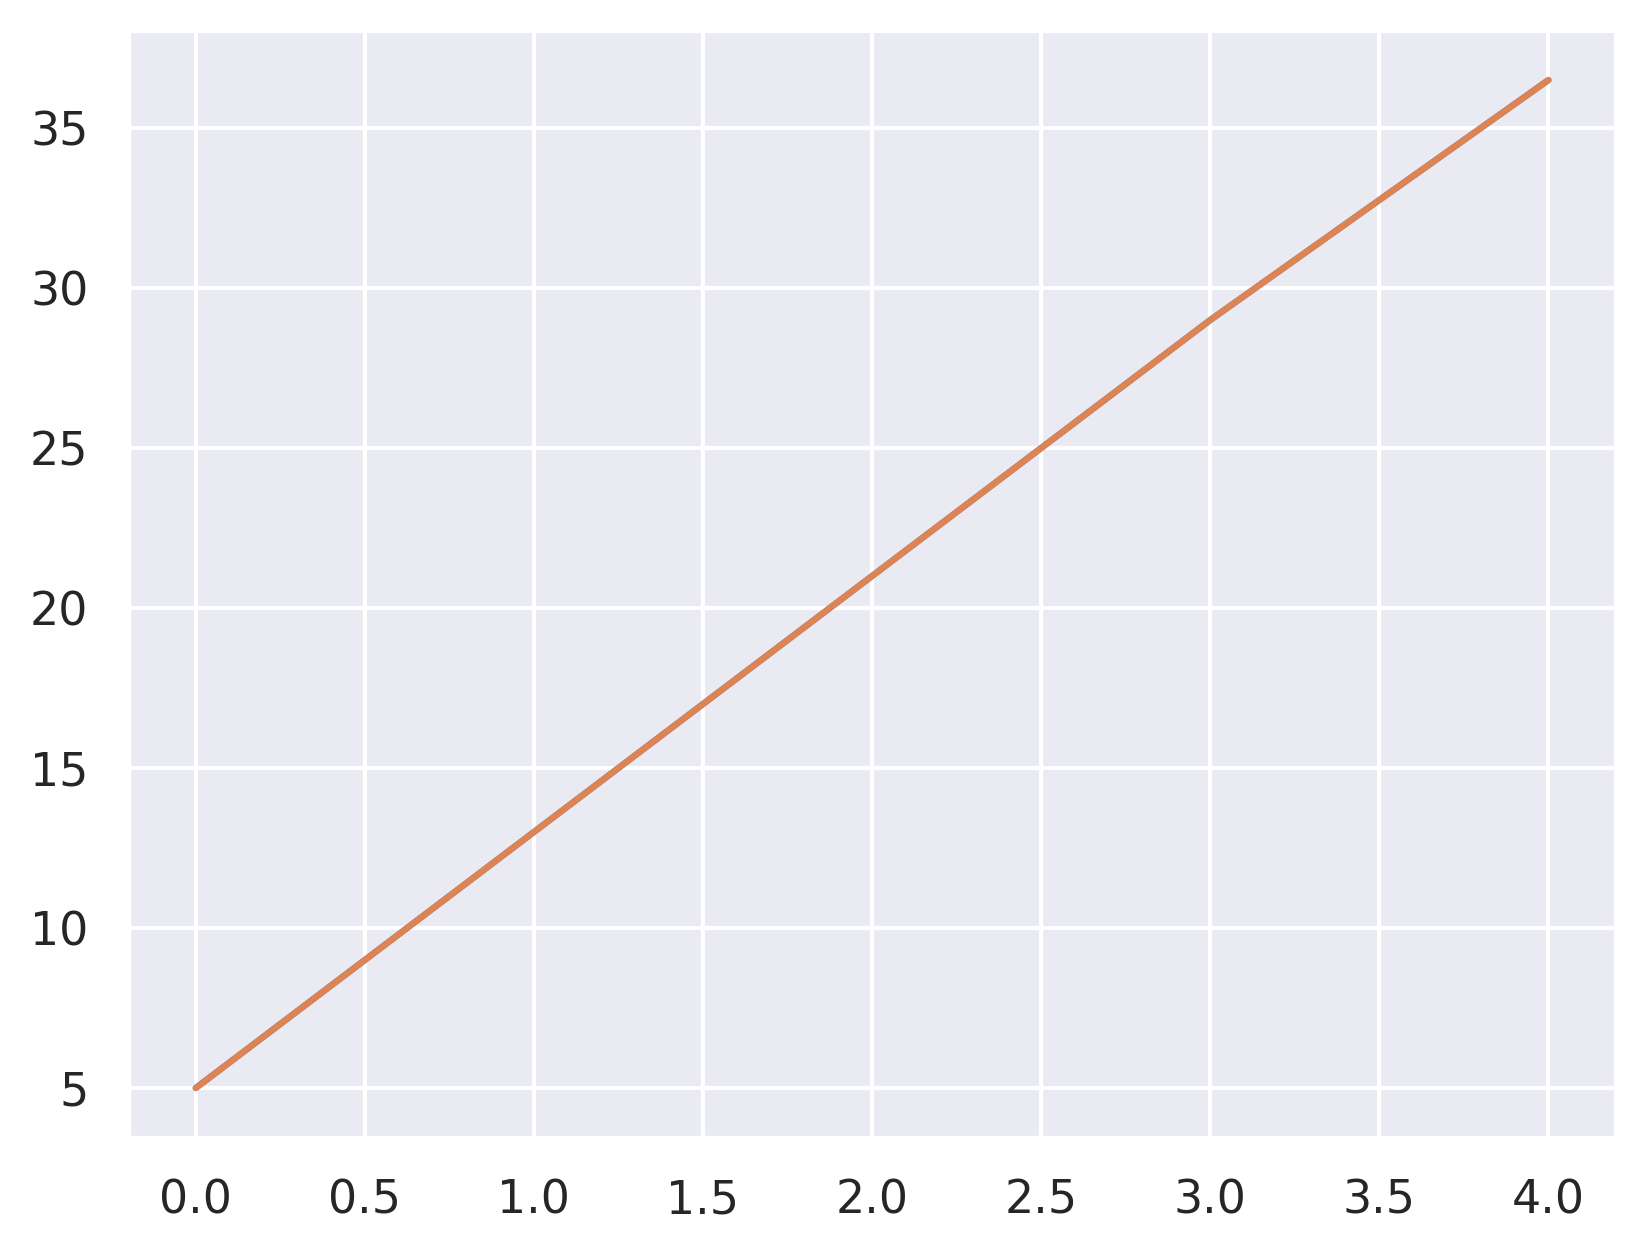

In [400]:
plt.plot(cA2)
plt.plot(mcA2)

In [401]:
def decompose(sgnl: np.array, level: int, dec_high: np.array, dec_low: np.array) -> list:
    padlen = len(dec_low)
    sg = np.pad(sgnl, padlen, mode='edge')
    # sg = sgnl
    ca = np.convolve(sg, dec_low, mode='full')[1+padlen:-padlen:2]
    cd = np.convolve(sg, dec_high, mode='full')[1+padlen:-padlen:2]
    out = [cd]
    for i in range(level-1):
        ca = np.pad(ca, padlen, mode='edge')
        out.append(np.convolve(ca, dec_high, mode='full')[1+padlen:-padlen:2])
        ca = np.convolve(ca, dec_low, mode='full')[1+padlen:-padlen:2]
    return [ca] + list(reversed(out))

mineLen: 12, decLen: 12


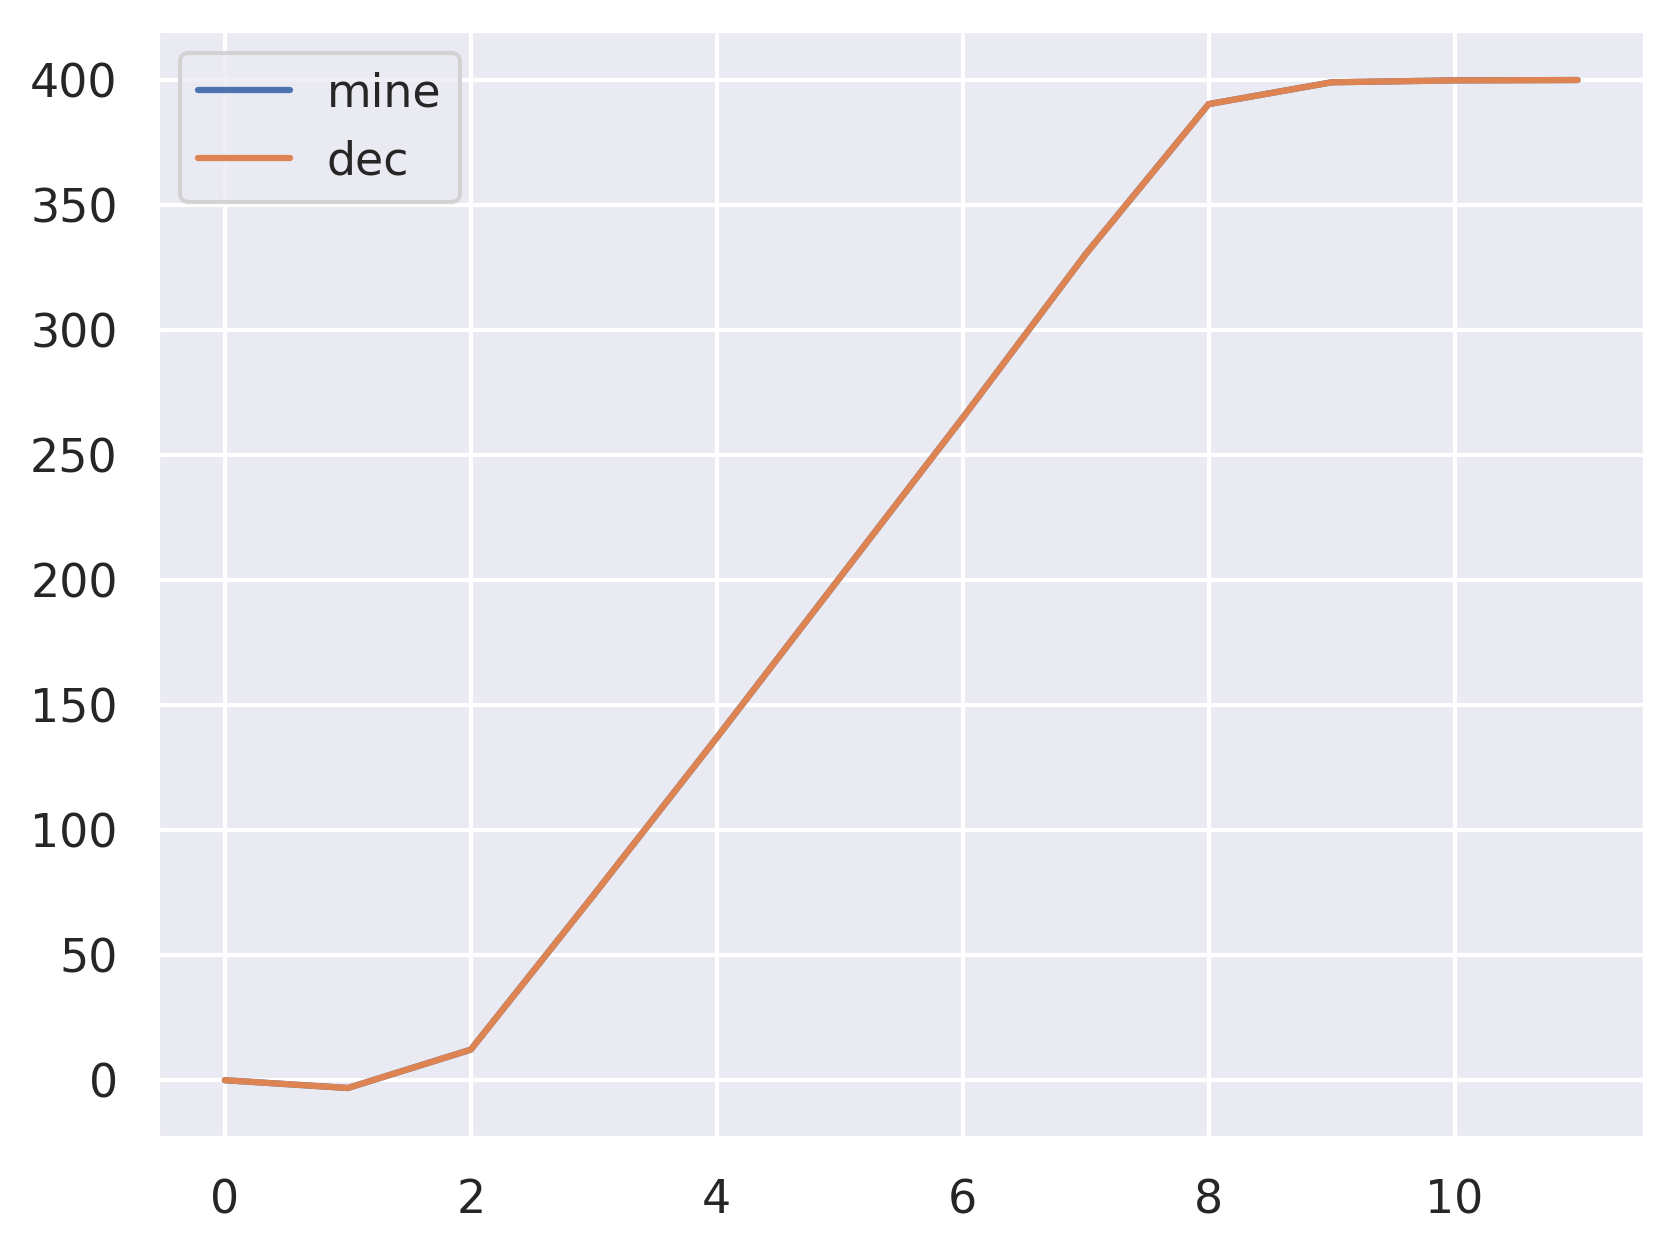

In [402]:
signal = np.linspace(0,100,101)
wavelet = pywt.Wavelet('sym4')
dec_lo, dec_hi, rec_lo, rec_hi = wavelet.filter_bank


level=4
cnt = 0
mine = decompose(signal, level=level, dec_high=dec_hi, dec_low=dec_lo)
dec = pywt.wavedec(signal, wavelet, level=level, mode='constant')

print(f"mineLen: {len(mine[cnt])}, decLen: {len(dec[cnt])}")

plt.plot(mine[cnt])
plt.plot(dec[cnt])
plt.legend(["mine", "dec"])